# Finding Exact Match (100%)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data = pd.read_csv('D:/C/wetransfer-92360b/data/so-github-Aug12.csv', sep=';')
data_2013 = data.drop_duplicates(subset=['gh-email'])
#data_2013['so-name(s)'] = data_2013['so-name(s)'].str.strip().astype(str)
#data_2013['gh-name'] = data_2013['gh-name'].str.strip().astype(str)
data_2013['so-name(s)'] = data_2013['so-name(s)'].str.lower()
data_2013['gh-name'] = data_2013['gh-name'].str.lower()

In [2]:
data_2013_exact= data_2013[data_2013['gh-name']==data_2013['so-name(s)']]

In [4]:
data4 = data_2013_exact[["gh-name", "so-name(s)"]].reset_index()
data4 = data4.drop(['index','so-name(s)'],axis=1)
data_2013_exact_names = data4['gh-name']

In [5]:
stack_new = pd.read_csv('C:/Users/moham/Downloads/USI.csv')
stack_new['display_name'] = stack_new['display_name'].str.lower()
#stack_new=stack_new['id']
stack_comment_new = pd.read_csv('C:/Users/moham/Downloads/answers.csv')
#stack_comment_new=stack_comment_new['DisplayName']
#stack_active = pd.merge(left=stack_new, right=stack_comment_new, how='left', left_on='id', right_on='owner_user_id')
stack_active = pd.merge(left=stack_new, right=stack_comment_new, how='inner', left_on='id', right_on='owner_user_id')
stack_active = stack_active.drop_duplicates(subset=['id'])

In [7]:
Match = set(data_2013_exact_names).intersection(set(stack_active['display_name']))
len(Match)

6148

In [9]:
data_git = pd.read_json('D:/Json_python/2020_1_gh.json', lines=True)
data_git['repo_name'] = data_git['repo_name'].str[0]
data_git = data_git.drop_duplicates(subset=['repo_name','name'])

In [10]:
data_git['name'] = data_git['name'].str.lower()

In [11]:
Final = set(data_git['name']).intersection(Match)
len(Final)

2398

In [12]:
kl = pd.DataFrame(Final,columns = ['display_name'])

In [13]:
st_tag = pd.read_csv('C:/Users/moham/OneDrive/Desktop/text_python/so_cont_tag.csv')

In [14]:
st_tag['display_name'] = st_tag['display_name'].str.lower()

In [15]:
uu = pd.merge(kl,st_tag,on='display_name')
uu = uu.drop_duplicates(subset=['display_name','id','tags'])

In [16]:
uu

,display_name,id,tags
0,bob,12822196,c#|youtube|null|getelementbyid
1,bob,588521,database|amazon-dynamodb
2,bob,13162189,ios|xcode|function|uiviewcontroller|viewcontro...
3,bob,1646167,java|cxf|classcastexception
4,bob,15077518,desktop|shortcut
...,...,...,...
8518,chad,2596079,c#|winforms
8519,chad,194031,c#|unit-testing|asp.net-mvc-4|asp.net-web-api|...
8520,chad,11448301,php|jquery|html|ajax
8521,chad,109676,oracle-sqldeveloper


In [17]:
gh_rep = pd.read_json('D:/Json_python/bq-results-20210713-012437-6ujws6tzvzoe.json', lines=True)
gh_rep['name'] = gh_rep['name'].str.lower()

In [18]:
gh_rep['repo_name'] = gh_rep['repo_name'].str[0]

In [19]:
gh_rep = gh_rep.drop_duplicates(subset=['name','repo_name'])

In [20]:
gh_rep

,name,repo_name
0,github,guizmaii/scala-nimbus-jose-jwt
1,thomas anderson,brightsparklabs/dockerfiles
2,ci pool trigger resource,cloudfoundry/relint-ci-pools
3,conda-forge-coordinator,conda-forge/feedstocks
5,doof,mitodl/bootcamp-ecommerce
...,...,...
8822762,juuliabellcom,OS2web/os2web_search
8822870,ddittert,selsta/hlsdl
8822962,frederic tulsidin,ShynRou/micro-down
8823025,github,Erotemic/ibeis


In [21]:
fg= pd.DataFrame(Final,columns=['name'])

In [22]:
ppo = pd.merge(gh_rep,fg,on='name')

In [23]:
ppo

,name,repo_name
0,eric,gitenberg-dev/gitberg
1,eric,EricJoosse/Integrador-Sistemas-com-PortalCrono...
2,eric,gravitee-io/gravitee-management-rest-api
3,eric,gravitee-io/graviteeio-access-management
4,eric,globules-io/OGX.JS
...,...,...
8674,surinder singh,aspectron/iris-app
8675,loc nguyen,locnh/locnh.github.io
8676,carlos fonseca,guilhermesad/rspotify
8677,matt sanders,formly-js/vue-formly


In [24]:
gh_ln = pd.read_json('D:/Json_python/bq-results-20210713-013749-pyz14mdiyata.json', lines=True)

In [25]:
gh_ln

,repo_name,language
0,ikn/pwrnotify,"[{'name': 'C', 'bytes': '9183'}]"
1,kentdev/AX12-Control-STM32F4,"[{'name': 'C', 'bytes': '19447'}]"
2,lueckenhoff/pps,"[{'name': 'C', 'bytes': '2264'}]"
3,wogml000419/Omok,"[{'name': 'C', 'bytes': '9632'}]"
4,mzemp/conversiontools,"[{'name': 'C', 'bytes': '194928'}]"
...,...,...
3331616,emiscience/NSUIColor-FlatColors,"[{'name': 'Objective-C', 'bytes': '12984'}, {'..."
3331617,ntnmrndn/Atlas-iOS,"[{'name': 'Objective-C', 'bytes': '749474'}, {..."
3331618,YeJinliang/SFTagView,"[{'name': 'Objective-C', 'bytes': '16662'}, {'..."
3331619,premosystems/MyEnvironmentConfig,"[{'name': 'Objective-C', 'bytes': '13177'}, {'..."


In [26]:
kll = pd.merge(ppo,gh_ln,on='repo_name')

In [27]:
kll

,name,repo_name,language
0,eric,gitenberg-dev/gitberg,"[{'name': 'Jupyter Notebook', 'bytes': '132423..."
1,eric,EricJoosse/Integrador-Sistemas-com-PortalCrono...,"[{'name': 'Batchfile', 'bytes': '80795'}, {'na..."
2,eric,gravitee-io/gravitee-management-rest-api,"[{'name': 'Batchfile', 'bytes': '5018'}, {'nam..."
3,eric,gravitee-io/graviteeio-access-management,"[{'name': 'Batchfile', 'bytes': '4027'}, {'nam..."
4,eric,globules-io/OGX.JS,[]
...,...,...,...
8674,surinder singh,aspectron/iris-app,"[{'name': 'HTML', 'bytes': '6425'}, {'name': '..."
8675,loc nguyen,locnh/locnh.github.io,"[{'name': 'CSS', 'bytes': '471889'}, {'name': ..."
8676,carlos fonseca,guilhermesad/rspotify,"[{'name': 'Ruby', 'bytes': '156534'}]"
8677,matt sanders,formly-js/vue-formly,"[{'name': 'JavaScript', 'bytes': '46023'}]"


In [28]:
pd.DataFrame(kll['language'])

,language
0,"[{'name': 'Jupyter Notebook', 'bytes': '132423..."
1,"[{'name': 'Batchfile', 'bytes': '80795'}, {'na..."
2,"[{'name': 'Batchfile', 'bytes': '5018'}, {'nam..."
3,"[{'name': 'Batchfile', 'bytes': '4027'}, {'nam..."
4,[]
...,...
8674,"[{'name': 'HTML', 'bytes': '6425'}, {'name': '..."
8675,"[{'name': 'CSS', 'bytes': '471889'}, {'name': ..."
8676,"[{'name': 'Ruby', 'bytes': '156534'}]"
8677,"[{'name': 'JavaScript', 'bytes': '46023'}]"


In [29]:
e=[]
for i in range(len(kll['language'])):
    e.append([x['name'] for x in kll['language'][i]])

In [30]:
kll['lan'] = e

In [31]:
kll

,name,repo_name,language,lan
0,eric,gitenberg-dev/gitberg,"[{'name': 'Jupyter Notebook', 'bytes': '132423...","[Jupyter Notebook, Python]"
1,eric,EricJoosse/Integrador-Sistemas-com-PortalCrono...,"[{'name': 'Batchfile', 'bytes': '80795'}, {'na...","[Batchfile, Java, TSQL]"
2,eric,gravitee-io/gravitee-management-rest-api,"[{'name': 'Batchfile', 'bytes': '5018'}, {'nam...","[Batchfile, HTML, Java, Shell]"
3,eric,gravitee-io/graviteeio-access-management,"[{'name': 'Batchfile', 'bytes': '4027'}, {'nam...","[Batchfile, CSS, Dockerfile, HTML, Java, JavaS..."
4,eric,globules-io/OGX.JS,[],[]
...,...,...,...,...
8674,surinder singh,aspectron/iris-app,"[{'name': 'HTML', 'bytes': '6425'}, {'name': '...","[HTML, JavaScript]"
8675,loc nguyen,locnh/locnh.github.io,"[{'name': 'CSS', 'bytes': '471889'}, {'name': ...","[CSS, CoffeeScript, HTML, JavaScript, Ruby, Sh..."
8676,carlos fonseca,guilhermesad/rspotify,"[{'name': 'Ruby', 'bytes': '156534'}]",[Ruby]
8677,matt sanders,formly-js/vue-formly,"[{'name': 'JavaScript', 'bytes': '46023'}]",[JavaScript]


In [32]:
kll = kll.drop(['language'],axis=1)

In [33]:
kll

,name,repo_name,lan
0,eric,gitenberg-dev/gitberg,"[Jupyter Notebook, Python]"
1,eric,EricJoosse/Integrador-Sistemas-com-PortalCrono...,"[Batchfile, Java, TSQL]"
2,eric,gravitee-io/gravitee-management-rest-api,"[Batchfile, HTML, Java, Shell]"
3,eric,gravitee-io/graviteeio-access-management,"[Batchfile, CSS, Dockerfile, HTML, Java, JavaS..."
4,eric,globules-io/OGX.JS,[]
...,...,...,...
8674,surinder singh,aspectron/iris-app,"[HTML, JavaScript]"
8675,loc nguyen,locnh/locnh.github.io,"[CSS, CoffeeScript, HTML, JavaScript, Ruby, Sh..."
8676,carlos fonseca,guilhermesad/rspotify,[Ruby]
8677,matt sanders,formly-js/vue-formly,[JavaScript]


In [34]:
stack_active

,id,display_name,owner_user_id
0,399,titanous,399
3,1975,webjedi,1975
4,1980,jared,1980
5,6073,sneeu,6073
7,11436,philippe grondier,11436
...,...,...,...
3404497,15233929,supriya bhosale,15233929
3404498,15250124,byte byte,15250124
3404499,15269149,ian,15269149
3404500,15271539,akshay kharat,15271539


In [35]:
uu

,display_name,id,tags
0,bob,12822196,c#|youtube|null|getelementbyid
1,bob,588521,database|amazon-dynamodb
2,bob,13162189,ios|xcode|function|uiviewcontroller|viewcontro...
3,bob,1646167,java|cxf|classcastexception
4,bob,15077518,desktop|shortcut
...,...,...,...
8518,chad,2596079,c#|winforms
8519,chad,194031,c#|unit-testing|asp.net-mvc-4|asp.net-web-api|...
8520,chad,11448301,php|jquery|html|ajax
8521,chad,109676,oracle-sqldeveloper


# Add tags to previous data

In [36]:
fin = pd.merge(kll,uu,left_on='name',right_on='display_name')

In [37]:
fin.to_csv('C:/Users/moham/OneDrive/Desktop/final.csv')

## Association Rules

In [1]:
from apyori import apriori
import pandas as pd
df = pd.read_csv('C:/Users/moham/OneDrive/Desktop/final.csv')
df['tags'] = df['tags'].apply(lambda x: x.replace('|',','),)
df = df.drop('Unnamed: 0',axis=1)
df

,name,repo_name,lan,display_name,id,tags
0,eric,gitenberg-dev/gitberg,"['Jupyter Notebook', 'Python']",eric,59961,"sql,postgresql"
1,eric,gitenberg-dev/gitberg,"['Jupyter Notebook', 'Python']",eric,340225,"javascript,synchronization"
2,eric,gitenberg-dev/gitberg,"['Jupyter Notebook', 'Python']",eric,2898715,"android,dialog,themes,alert"
3,eric,gitenberg-dev/gitberg,"['Jupyter Notebook', 'Python']",eric,2898715,"android,android-dialogfragment,customdialog"
4,eric,gitenberg-dev/gitberg,"['Jupyter Notebook', 'Python']",eric,4972269,"python,string,python-3.x,format"
...,...,...,...,...,...,...
208928,surinder singh,aspectron/iris-app,"['HTML', 'JavaScript']",surinder singh,1051425,"javascript,jquery,coffeescript"
208929,surinder singh,aspectron/iris-app,"['HTML', 'JavaScript']",surinder singh,1051425,"html,css,css-selectors,pseudo-element,inline-s..."
208930,matt sanders,formly-js/vue-formly,['JavaScript'],matt sanders,1006183,"python,django,django-models"
208931,matt sanders,formly-js/vue-formly,['JavaScript'],matt sanders,1006183,"python,django,unit-testing"


In [2]:
df.drop_duplicates(subset=['id']).reset_index()

,index,name,repo_name,lan,display_name,id,tags
0,0,eric,gitenberg-dev/gitberg,"['Jupyter Notebook', 'Python']",eric,59961,"sql,postgresql"
1,1,eric,gitenberg-dev/gitberg,"['Jupyter Notebook', 'Python']",eric,340225,"javascript,synchronization"
2,2,eric,gitenberg-dev/gitberg,"['Jupyter Notebook', 'Python']",eric,2898715,"android,dialog,themes,alert"
3,4,eric,gitenberg-dev/gitberg,"['Jupyter Notebook', 'Python']",eric,4972269,"python,string,python-3.x,format"
4,5,eric,gitenberg-dev/gitberg,"['Jupyter Notebook', 'Python']",eric,102441,"python,unit-testing"
...,...,...,...,...,...,...,...
5322,208924,varun,retest/recheck,"['Java', 'JavaScript', 'Shell']",varun,6333329,"ftp,sftp,filezilla"
5323,208925,varun,retest/recheck,"['Java', 'JavaScript', 'Shell']",varun,14926984,python-3.x
5324,208927,varun,retest/recheck,"['Java', 'JavaScript', 'Shell']",varun,3184776,"algorithm,combinatorics"
5325,208928,surinder singh,aspectron/iris-app,"['HTML', 'JavaScript']",surinder singh,1051425,"javascript,jquery,coffeescript"


In [40]:
top_five = ['python','javascript','c#','java','php']
pattern = '|'.join(top_five)

# Find Unique Users who contribute one of top_five Languages

In [41]:
df[df['tags'].str.contains(pattern)].drop_duplicates(subset=['id']).reset_index()

,index,name,repo_name,lan,display_name,id,tags
0,1,eric,gitenberg-dev/gitberg,"['Jupyter Notebook', 'Python']",eric,340225,"javascript,synchronization"
1,4,eric,gitenberg-dev/gitberg,"['Jupyter Notebook', 'Python']",eric,4972269,"python,string,python-3.x,format"
2,5,eric,gitenberg-dev/gitberg,"['Jupyter Notebook', 'Python']",eric,102441,"python,unit-testing"
3,7,eric,gitenberg-dev/gitberg,"['Jupyter Notebook', 'Python']",eric,925394,"c#,android,ios,unity3d,internet-connection"
4,8,eric,gitenberg-dev/gitberg,"['Jupyter Notebook', 'Python']",eric,309190,"python,intercept,traceback"
...,...,...,...,...,...,...,...
2463,208917,varun,retest/recheck,"['Java', 'JavaScript', 'Shell']",varun,3454208,"java,arrays"
2464,208920,varun,retest/recheck,"['Java', 'JavaScript', 'Shell']",varun,13701205,"c#,sqlite"
2465,208925,varun,retest/recheck,"['Java', 'JavaScript', 'Shell']",varun,14926984,python-3.x
2466,208928,surinder singh,aspectron/iris-app,"['HTML', 'JavaScript']",surinder singh,1051425,"javascript,jquery,coffeescript"


In [1]:
from apyori import apriori
import pandas as pd
df = pd.read_csv('C:/Users/moham/OneDrive/Desktop/final.csv')
df['tags'] = df['tags'].apply(lambda x: x.replace('|',','),)
df = df.drop('Unnamed: 0',axis=1)
df = df.groupby(['id'])['tags'].apply(','.join).reset_index()
#df['tags'] = df['tags'].apply(lambda x: [y.strip() for y in x]) this code remove space from each row of lists of string

In [2]:
newlist_2 = []
for word in list(df['tags']):
    word = word.split(",")
    newlist_2.append(word)

df['tags'] = newlist_2
df['tags'] = df['tags'].apply(lambda x: list(set(x)))
df

,id,tags
0,33,"[algorithm, azure, azure-powershell, url, azur..."
1,82,[ocaml]
2,188,"[django, python, django-orm, django-queryset, ..."
3,257,"[push, git]"
4,878,"[google-chrome, canvas, javascript]"
...,...,...
5322,15271267,[pdf]
5323,15282070,"[performance, c#, datagridview]"
5324,15284335,"[modeling, uml]"
5325,15291125,"[c++, webcam, opencv, video-capture]"


In [5]:
from ast import literal_eval

df.tags.explode().value_counts()

python            749
javascript        570
java              498
c#                444
php               306
                 ... 
data-mining         1
aol                 1
emacs24             1
avaudiosession      1
createelement       1
Name: tags, Length: 4902, dtype: int64

In [17]:
import pandas as pd
ohe_df = pd.read_csv('C:/Users/moham/OneDrive/Desktop/lan_encoded.csv')
ohe_df = ohe_df.drop(['Unnamed: 4902','Unnamed: 0'],axis=1)

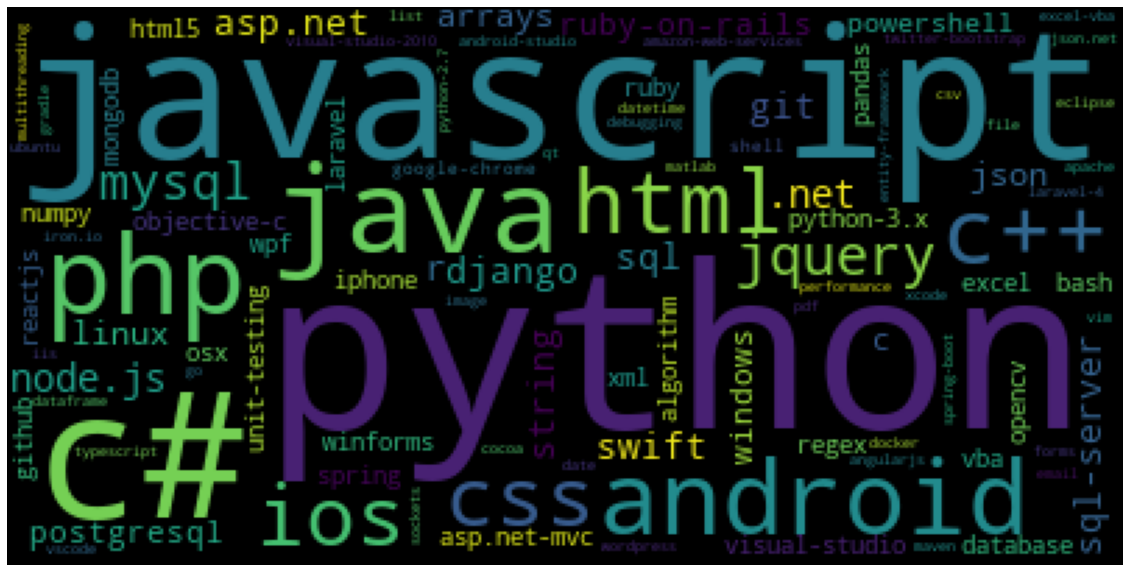

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

kl = pd.DataFrame(ohe_df.sum(),columns=['counts'])
skl_tag_counts = kl
top_tags = skl_tag_counts.sort_values('counts', ascending=False).head(100)
top_dict = top_tags.to_dict()
top_dict = top_dict['counts']
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=top_dict)

def plot_cloud(wordcloud):
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
    plt.axis("off")

plot_cloud(wordcloud)

<BarContainer object of 5 artists>

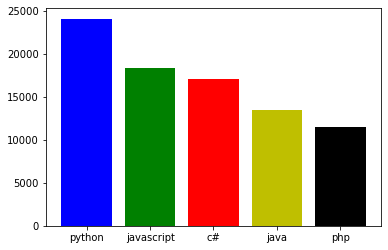

In [3]:
import numpy as np
import matplotlib.pyplot as plt
lst = list(df['tags'])
newlist = []
for word in lst:
    word = word.split(",")
    newlist.extend(word)
    
from collections import Counter
word_counts = Counter(newlist)
top_four = word_counts.most_common(5)
xs, ys = [*zip(*top_four)]
plt.bar(xs, ys,color=['b','g','r','y','black'])

# FP-Growth Algorithm

#  <font color='blue'>Python Tag Rules</font>

In [6]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth,association_rules,apriori
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('C:/Users/moham/OneDrive/Desktop/final.csv')
df['tags'] = df['tags'].apply(lambda x: x.replace('|',','),)
df = df.drop('Unnamed: 0',axis=1)

dataset = []
for i in range(len(df['tags'])):
    dataset.append(df['tags'][i].split(","))

te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_array, columns=te.columns_)

frequent_itemsets_fp=fpgrowth(df, min_support=0.0001, use_colnames=True)

rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.2)

file_result_df = rules_fp[rules_fp['antecedents'].apply(lambda x: 'python' in str(x))]


file_result_df["consequents"] = file_result_df["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
#file_result_df = file_result_df[~file_result_df["consequents"].str.contains('python')]

file_result_df["antecedent_len"] = file_result_df["antecedents"].apply(lambda x: len(x))

file_result_df["antecedents"] = [list(x) for x in file_result_df["antecedents"]]

file_result_df["antecedents"] = [','.join(map(str, l)) for l in file_result_df["antecedents"]]

#fname = 'python'
#file_result_df = rules_fp[rules_fp['antecedents'].astype(str).str.lower().str.contains(fname)]

In [7]:
pp = frequent_itemsets_fp[frequent_itemsets_fp['itemsets'].apply(lambda x: 'python' in str(x))]

In [8]:
pp = frequent_itemsets_fp[frequent_itemsets_fp['itemsets'].apply(lambda x: 'python-3.x' in str(x))]
pp["antecedent_len"] = pp["itemsets"].apply(lambda x: len(x))
pp["itemsets"] = [list(x) for x in pp["itemsets"]]
pp["itemsets"] = [','.join(map(str, l)) for l in pp["itemsets"]]
pp.sort_values('antecedent_len', ascending=True)
pp_1 = pp[pp['antecedent_len']==1]
pp_2 = pp[pp['antecedent_len']==2]
pp_3 = pp[pp['antecedent_len']==3]
pp_4 = pp[pp['antecedent_len']==4]
pp_5 = pp[pp['antecedent_len']==5]

In [10]:
import numpy as np
except_python = ['python_related','ipython-notebook','ipython','activepython','boost-python','python-import','python-imaging-library',
'python-module','mysql-python','python-xarray','python-webbrowser','ironpython','python-embedding','pythonpath','python-unicode',
'python-idle','gitpython','python-2.7','python-2.x','python-3.4','python-3.5','python-3.x']
pattern = '|'.join(except_python)
pure_python = pp_2[~pp_2['itemsets'].str.contains(pattern)]

In [11]:
newlist_2 = []
for word in list(pure_python['itemsets']):
    word = word.split(",")
    newlist_2.extend(word)
    
newlist_2

['python-3.x',
 'python',
 'string',
 'python-3.x',
 'python-3.x',
 'numpy',
 'django',
 'python-3.x',
 'python-3.x',
 'format',
 'python-3.x',
 'selenium',
 'python-3.x',
 'tkinter',
 'python-3.x',
 'algorithm',
 'python-3.x',
 'file',
 'proxy',
 'python-3.x',
 'python-3.x',
 'performance',
 'python-3.x',
 'logging',
 'django-models',
 'python-3.x',
 'python-3.x',
 'search',
 'python-3.x',
 'printing',
 'python-3.x',
 'django-rest-framework',
 'python-3.x',
 'jupyter-notebook',
 'selenium-webdriver',
 'python-3.x',
 'firefox',
 'python-3.x',
 'virtualenv',
 'python-3.x',
 'python-3.x',
 'python-requests',
 'python-3.x',
 'combinations',
 'python-3.x',
 'subset-sum',
 'python-3.x',
 'syntax',
 'python-3.x',
 'sympy',
 'python-3.x',
 'opencv3.0',
 'pip',
 'python-3.x',
 'python-3.x',
 'ellipsis',
 'python-3.x',
 'pep8',
 'python-3.x',
 'urllib',
 'python-3.x',
 'tor',
 'python-3.x',
 'py2app',
 'python-3.x',
 'doctest',
 'httprequest',
 'python-3.x']

In [5]:
import numpy as np
except_python = ['python_related','ipython-notebook','ipython','activepython','boost-python','python-import','python-imaging-library',
'python-module','mysql-python','python-xarray','python-webbrowser','ironpython','python-embedding','pythonpath','python-unicode',
'python-idle','gitpython','python-2.7','python-2.x','python-3.4','python-3.5']
pattern = '|'.join(except_python)
pure_python = pp_2[~pp_2['itemsets'].str.contains(pattern)]
newlist_2 = []
for word in list(pure_python['itemsets']):
    word = word.split(",")
    newlist_2.extend(word)

def unique(list1):
    x = np.array(list1)
    return np.unique(x)

rr_2 = pd.DataFrame(unique(newlist_2))

rr_2 = rr_2[~rr_2[0].str.contains("python-3.x|python")].reset_index()
rr_2

,0
0,algorithm
1,combinations
2,django
3,django-models
4,django-rest-framework
5,doctest
6,ellipsis
7,file
8,firefox
9,format


In [132]:
except_python = ['python_related','ipython-notebook','ipython','activepython','boost-python','python-import','python-imaging-library',
'python-module','mysql-python','python-xarray','python-webbrowser','ironpython','python-embedding','pythonpath','python-unicode',
'python-idle','gitpython','python-2.7','python-2.x','python-3.4','python-3.5']
pattern = '|'.join(except_python)
pure_python = pp_3[~pp_3['itemsets'].str.contains(pattern)]
newlist_3 = []
for word in list(pure_python['itemsets']):
    word = word.split(",")
    newlist_3.extend(word)

def unique(list1):
    x = np.array(list1)
    return np.unique(x)

rr_3 = pd.DataFrame(unique(newlist_3))

rr_3 = rr_3[~rr_3[0].str.contains("python-3.x|python")].reset_index()
rr_3

,index,0
0,0,algorithm
1,1,combinations
2,2,django
3,3,django-models
4,4,django-rest-framework
5,5,doctest
6,6,ellipsis
7,7,file
8,8,firefox
9,9,format


In [4]:
pp

,support,itemsets
10,0.115178,(python)
12,0.007653,(python-3.x)
87,0.001986,(ipython-notebook)
133,0.001857,(ipython)
440,0.000215,(activepython)
...,...,...
22833,0.000172,"(python, notation)"
22834,0.000172,"(python, decimal, notation)"
22838,0.000101,"(gitpython, git)"
22839,0.000101,"(python, gitpython)"


In [5]:
pp["antecedent_len"] = pp["itemsets"].apply(lambda x: len(x))

In [6]:
pp

,support,itemsets,antecedent_len
10,0.115178,(python),1
12,0.007653,(python-3.x),1
87,0.001986,(ipython-notebook),1
133,0.001857,(ipython),1
440,0.000215,(activepython),1
...,...,...,...
22833,0.000172,"(python, notation)",2
22834,0.000172,"(python, decimal, notation)",3
22838,0.000101,"(gitpython, git)",2
22839,0.000101,"(python, gitpython)",2


In [7]:
pp["itemsets"] = [list(x) for x in pp["itemsets"]]

pp["itemsets"] = [','.join(map(str, l)) for l in pp["itemsets"]]

In [9]:
pp.sort_values('antecedent_len', ascending=True)

,support,itemsets,antecedent_len
10,0.115178,python,1
2960,0.000239,python-idle,1
2953,0.000239,python-unicode,1
2887,0.000187,pythonpath,1
2869,0.000426,python-3.5,1
...,...,...,...
19322,0.000282,"py2app,python,tkinter,fwrite,file-io",5
8079,0.000641,"machine-learning,sparse-matrix,python,classifi...",5
17664,0.000124,"powershell,excel,python,php,ms-office",5
10063,0.000373,"python,caching,http,django,browser",5


In [12]:
pp_1 = pp[pp['antecedent_len']==1]
pp_2 = pp[pp['antecedent_len']==2]
pp_3 = pp[pp['antecedent_len']==3]
pp_4 = pp[pp['antecedent_len']==4]
pp_5 = pp[pp['antecedent_len']==5]

In [ ]:
for i in pp_2['itemsets']:
    print(i)

In [19]:
python_related = ['python_related','ipython-notebook','ipython','activepython','boost-python','python-import','python-imaging-library',
'python-module','mysql-python','python-xarray','python-webbrowser','ironpython','python-embedding','pythonpath','python-unicode',
'python-idle','gitpython']

In [20]:
python_version = ['python-3.x','python-2.7','python-2.x','python-3.4','python-3.5']

In [56]:
except_python = ['python_related','ipython-notebook','ipython','activepython','boost-python','python-import','python-imaging-library',
'python-module','mysql-python','python-xarray','python-webbrowser','ironpython','python-embedding','pythonpath','python-unicode',
'python-idle','gitpython','python-3.x','python-2.7','python-2.x','python-3.4','python-3.5']

In [ ]:
pattern = '|'.join(except_python)
pure_python = pp_2[~pp_2['itemsets'].str.contains(pattern)]
newlist_2 = []
for word in list(pure_python['itemsets']):
    word = word.split(",")
    newlist_2.extend(word)

def unique(list1):
    x = np.array(list1)
    return np.unique(x)

rr_2 = pd.DataFrame(unique(newlist_2))

rr_2 = rr_2[~rr_2[0].str.contains("python")].reset_index()

In [108]:
pattern = '|'.join(except_python)
pure_python = pp_2[~pp_2['itemsets'].str.contains(pattern)]

In [109]:
newlist_2 = []
for word in list(pure_python['itemsets']):
    word = word.split(",")
    newlist_2.extend(word)

def unique(list1):
    x = np.array(list1)
    return np.unique(x)

rr_2 = pd.DataFrame(unique(newlist_2))

rr_2 = rr_2[~rr_2[0].str.contains("python")].reset_index()

In [110]:
pattern = '|'.join(except_python)
pure_python = pp_3[~pp_3['itemsets'].str.contains(pattern)]

In [111]:
newlist_3 = []
for word in list(pure_python['itemsets']):
    word = word.split(",")
    newlist_3.extend(word)

def unique(list1):
    x = np.array(list1)
    return np.unique(x)

rr_3 = pd.DataFrame(unique(newlist_3))

rr_3 = rr_3[~rr_3[0].str.contains("python")].reset_index()

In [ ]:
df["Unique"] = df["Ligand_miss"][~df["Ligand_miss"].isin(df["Ligand_hit"])].drop_duplicates()

In [119]:
unique_of_lvl2 = rr_2[~rr_2[0].isin(rr_3[0])]

In [ ]:
pattern = '|'.join(except_python)
pure_python = pp_4[~pp_4['itemsets'].str.contains(pattern)]

In [120]:
newlist_4 = []
for word in list(pure_python['itemsets']):
    word = word.split(",")
    newlist_4.extend(word)

def unique(list1):
    x = np.array(list1)
    return np.unique(x)

rr_4 = pd.DataFrame(unique(newlist_4))

rr_4 = rr_4[~rr_4[0].str.contains("python")].reset_index()

In [121]:
rr_4

,index,0
0,0,3d
1,1,abstract-class
2,2,abstract-methods
3,3,algorithm
4,4,amazon-cloudfront
...,...,...
357,359,xlwings
358,360,xml
359,361,zbar
360,362,zeromq


In [ ]:
pattern = '|'.join(except_python)
pure_python = pp_5[~pp_5['itemsets'].str.contains(pattern)]

In [123]:
newlist_5 = []
for word in list(pure_python['itemsets']):
    word = word.split(",")
    newlist_5.extend(word)

def unique(list1):
    x = np.array(list1)
    return np.unique(x)

rr_5 = pd.DataFrame(unique(newlist_5))

rr_5 = rr_5[~rr_5[0].str.contains("python")].reset_index()

In [124]:
rr_5

,index,0
0,0,3d
1,1,abstract-class
2,2,abstract-methods
3,3,algorithm
4,4,amazon-cloudfront
...,...,...
357,359,xlwings
358,360,xml
359,361,zbar
360,362,zeromq


In [14]:
frequent_itemsets_fp.sort_values( 'support', ascending=False)

,support,itemsets
10,0.115178,(python)
2,0.087647,(javascript)
16,0.081727,(c#)
27,0.064558,(java)
119,0.055005,(php)
...,...,...
8496,0.000101,"(space, indentation)"
8495,0.000101,"(lombok, java)"
8494,0.000101,"(lombok, reflection)"
8493,0.000101,"(lombok, properties)"


In [7]:
frequent_itemsets_fp

,support,itemsets
0,0.017920,(sql)
1,0.011119,(postgresql)
2,0.087647,(javascript)
3,0.001225,(synchronization)
4,0.045719,(android)
...,...,...
22840,0.000101,"(python, git, gitpython)"
22841,0.000105,"(azureservicebus, azure)"
22842,0.000101,"(try-catch, shorthand)"
22843,0.000101,"(shorthand, javascript)"


In [4]:
df

,.bash-profile,.htaccess,.net,.net-2.0,.net-3.5,.net-4.0,.net-4.5,.net-assembly,.net-core,.netrc,...,zookeeper,zoom,zope,zsh,zsh-completion,zshrc,zurb-foundation,zurb-foundation-5,zurb-foundation-6,zxing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208923,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
208924,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
208925,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
208926,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [358]:
list[0]

'abstract-class,python'

In [359]:
dd = []
for i in range(len(list)):
    dd.append(list[i].split(","))

In [363]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [366]:
flattened = [val for sublist in dd for val in sublist]

In [365]:
len(dd)

1364

In [373]:
import numpy as np
 
# function to get unique values
def unique(list1):
    x = np.array(list1)
    return np.unique(x)

In [374]:
un = unique(flattened)

In [386]:
df = pd.DataFrame()
df['column_name']=pd.Series(un)

In [391]:
df[df['column_name'].str.contains('python')]

,column_name
3,activepython
27,boost-python
133,gitpython
166,ipython
167,ipython-notebook
168,ironpython
216,mysql-python
273,python
274,python-2.7
275,python-2.x


In [380]:
bar = np.array(un)

In [383]:
np.flatnonzero(np.core.defchararray.find('python',un)!=-1)

array([273], dtype=int64)

In [331]:
file_result_df = file_result_df[file_result_df["antecedents"].str.contains('python', regex=True)]

In [347]:
file_result_df.groupby(['antecedents','consequents']).size().reset_index().rename(columns={0:'count'})['antecedents'].unique()

array(['abstract-class,python', 'abstract-class,python,class',
       'abstract-class,python,override', ..., 'zope,python,session',
       'zope,python,sqlalchemy', 'zope,python,sqlalchemy,session'],
      dtype=object)

In [336]:
import numpy as np
 
# function to get unique values
def unique(list1):
    x = np.array(list1)
    print(np.unique(x))
unique(list)

['abstract-class,python' 'abstract-class,python,class'
 'abstract-class,python,override' ... 'zope,python,session'
 'zope,python,sqlalchemy' 'zope,python,sqlalchemy,session']


In [338]:
joined_string = ",".join(list)

In [343]:
joined_string

'abstract-class,python,abstract-class,python,class,abstract-class,python,override,abstract-methods,multiple-inheritance,python,abstract-methods,python,abstract-methods,python,metaclass,activepython,algorithm,python,algorithm,python,matlab,algorithm,python,search,algorithm,python,subset-sum,amazon-cloudfront,amazon-s3,django,python,amazon-cloudfront,amazon-s3,python,amazon-cloudfront,django,python,amazon-cloudfront,django-compressor,amazon-s3,python,amazon-cloudfront,django-compressor,django,python,amazon-cloudfront,django-compressor,python,amazon-cloudfront,python,amazon-s3,buffering,python,amazon-s3,csv,python,amazon-s3,django,python,amazon-s3,django-compressor,python,amazon-s3,python,animation,python,animation,python,python-embedding,animation,python-embedding,animation,python-embedding,python,animation,tkinter,python,animation,tkinter,python,python-embedding,animation,tkinter,python-embedding,ansi-escape,python,ansi-escape,python,python-2.7,ansi-escape,python-2.7,ansi-escape,windows